## Problem 1: Analyzing Sales Data
Dataset: Use a dataset containing sales records of a store, including columns like Date, Product Name, Quantity Sold, and Price.

Tasks:

1. Load the dataset into a Pandas DataFrame.
2. Calculate the total sales and total profit for each product.
3. Find the top-selling products based on the quantity sold.
4. Calculate the average price of products.
5. Identify the months with the highest sales.
6. Plot the sales trend over time.

### Load the dataset into a Pandas DataFrame.

In [1]:
import pandas as pd
sales_data = pd.read_csv('../data-files/supermarket_sales - Sheet1.csv')
sales_data.describe


<bound method NDFrame.describe of       Invoice ID Branch       City Customer type  Gender  \
0    750-67-8428      A     Yangon        Member  Female   
1    226-31-3081      C  Naypyitaw        Normal  Female   
2    631-41-3108      A     Yangon        Normal    Male   
3    123-19-1176      A     Yangon        Member    Male   
4    373-73-7910      A     Yangon        Normal    Male   
..           ...    ...        ...           ...     ...   
995  233-67-5758      C  Naypyitaw        Normal    Male   
996  303-96-2227      B   Mandalay        Normal  Female   
997  727-02-1313      A     Yangon        Member    Male   
998  347-56-2442      A     Yangon        Normal    Male   
999  849-09-3807      A     Yangon        Member  Female   

               Product line  Unit price  Quantity   Tax 5%      Total  \
0         Health and beauty       74.69         7  26.1415   548.9715   
1    Electronic accessories       15.28         5   3.8200    80.2200   
2        Home and lifestyl

In [2]:
sales_data.head()

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,1/5/2019,13:08,Ewallet,522.83,4.761905,26.1415,9.1
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,3/8/2019,10:29,Cash,76.40,4.761905,3.8200,9.6
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,3/3/2019,13:23,Credit card,324.31,4.761905,16.2155,7.4
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,1/27/2019,20:33,Ewallet,465.76,4.761905,23.2880,8.4
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2/8/2019,10:37,Ewallet,604.17,4.761905,30.2085,5.3


### Calculate the total sales and total profit for each product.

In [3]:
total_sales = sales_data.groupby(['Product line']).Total.sum()
total_sales

Product line
Electronic accessories    54337.5315
Fashion accessories       54305.8950
Food and beverages        56144.8440
Health and beauty         49193.7390
Home and lifestyle        53861.9130
Sports and travel         55122.8265
Name: Total, dtype: float64

In [4]:
total_profit = sales_data.groupby('Product line')['gross income'].sum()
total_profit

Product line
Electronic accessories    2587.5015
Fashion accessories       2585.9950
Food and beverages        2673.5640
Health and beauty         2342.5590
Home and lifestyle        2564.8530
Sports and travel         2624.8965
Name: gross income, dtype: float64

### Find the top-selling products based on the quantity sold.

In [5]:
grouped_product_by_qty = sales_data.groupby('Product line')['Quantity'].sum().reset_index()
grouped_product_by_qty

,Product line,Quantity
0,Electronic accessories,971
1,Fashion accessories,902
2,Food and beverages,952
3,Health and beauty,854
4,Home and lifestyle,911
5,Sports and travel,920


In [6]:
grouped_product_by_qty.sort_values(by='Quantity', ascending=False)

,Product line,Quantity
0,Electronic accessories,971
2,Food and beverages,952
5,Sports and travel,920
4,Home and lifestyle,911
1,Fashion accessories,902
3,Health and beauty,854


In [7]:
grouped_product_by_qty.iloc[0]

Product line    Electronic accessories
Quantity                           971
Name: 0, dtype: object

### Calculate the average price of products.

In [8]:
average_price_per_product = sales_data.groupby('Product line')['Unit price'].mean()
average_price_per_product

Product line
Electronic accessories    53.551588
Fashion accessories       57.153652
Food and beverages        56.008851
Health and beauty         54.854474
Home and lifestyle        55.316937
Sports and travel         56.993253
Name: Unit price, dtype: float64

In [9]:
explore_data = sales_data.groupby('Product line')['Unit price'].agg(['mean', 'max', 'min', 'sum'])
explore_data

,mean,max,min,sum
Product line,,,,
Electronic accessories,53.551588,99.73,10.56,9103.77
Fashion accessories,57.153652,99.89,10.18,10173.35
Food and beverages,56.008851,99.79,10.13,9745.54
Health and beauty,54.854474,99.96,10.08,8337.88
Home and lifestyle,55.316937,99.92,10.53,8850.71
Sports and travel,56.993253,99.96,10.17,9460.88


### Identify the months with the highest sales.

In [10]:
# Convert 'date_column' to datetime format (if it's not already)
sales_data['date_column'] = pd.to_datetime(sales_data['Date'])

# Split 'date_column' into separate columns for month, day, and year
sales_data['month'] = sales_data['date_column'].dt.month
sales_data['day'] = sales_data['date_column'].dt.day
sales_data['year'] = sales_data['date_column'].dt.year

sales_data.head()

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,...,Time,Payment,cogs,gross margin percentage,gross income,Rating,date_column,month,day,year
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,...,13:08,Ewallet,522.83,4.761905,26.1415,9.1,2019-01-05,1,5,2019
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,...,10:29,Cash,76.40,4.761905,3.8200,9.6,2019-03-08,3,8,2019
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,...,13:23,Credit card,324.31,4.761905,16.2155,7.4,2019-03-03,3,3,2019
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,...,20:33,Ewallet,465.76,4.761905,23.2880,8.4,2019-01-27,1,27,2019
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,...,10:37,Ewallet,604.17,4.761905,30.2085,5.3,2019-02-08,2,8,2019


In [11]:
sales_data_with_highest_monthly_sales = sales_data.groupby(['year', 'month'])['Total'].sum().reset_index()
sales_data_with_highest_monthly_sales

,year,month,Total
0,2019,1,116291.868
1,2019,2,97219.374
2,2019,3,109455.507


In [12]:
hightest_sales_sorted = sales_data_with_highest_monthly_sales.sort_values(by='Total', ascending=False)
hightest_sales_sorted

,year,month,Total
0,2019,1,116291.868
2,2019,3,109455.507
1,2019,2,97219.374


In [13]:
hightest_sales_sorted.iloc[0]

year       2019.000
month         1.000
Total    116291.868
Name: 0, dtype: float64

### Plot some interesting sales trends with the data

In [14]:
# nbval: skip

import pandas as pd
pd.plotting.register_matplotlib_converters()
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
print("Setup Complete")

Setup Complete


<Axes: xlabel='Product line', ylabel='Total'>

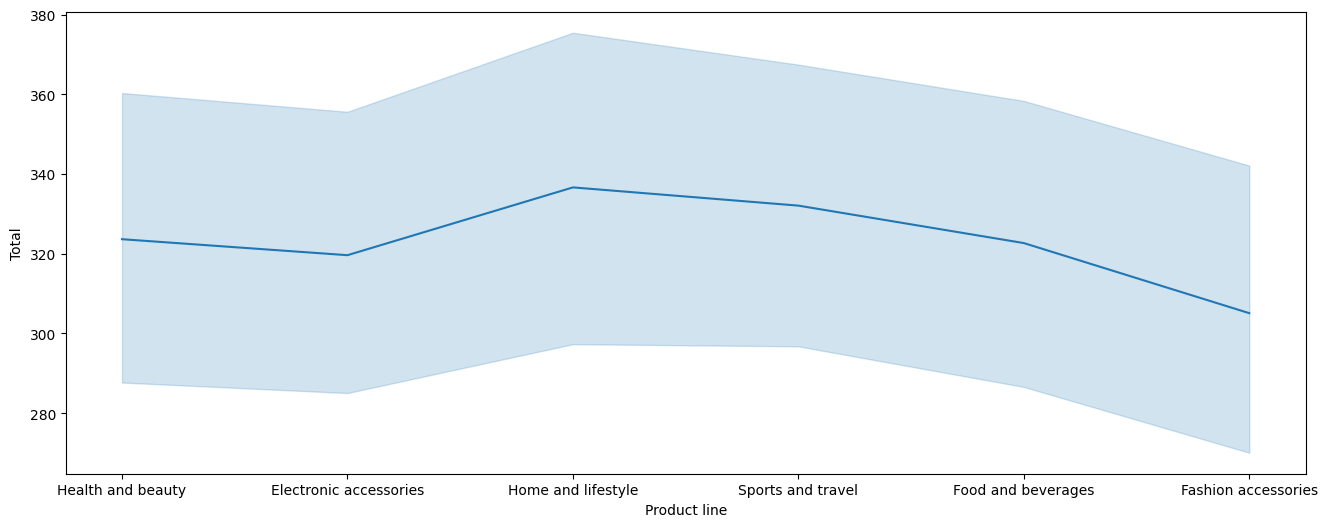

In [15]:
# Set the width and height of the figure
plt.figure(figsize=(16,6))

# Line chart showing how productlines did for total sales 
sns.lineplot(data=sales_data, y=sales_data['Total'], x=sales_data['Product line'])

In [16]:
# nbval: skip
mean_product_gross_by_city = sales_data.groupby(['City', 'Product line'])['gross income'].mean()
result_df = mean_product_gross_by_city.reset_index(name='mean_gross_income')
result_df.head()

,City,Product line,mean_gross_income
0,Mandalay,Electronic accessories,14.763155
1,Mandalay,Fashion accessories,12.606234
2,Mandalay,Food and beverages,14.490370
3,Mandalay,Health and beauty,17.952075
4,Mandalay,Home and lifestyle,16.713490


### Chart using `catplot`

In Seaborn's catplot function, you can set the width of the resulting graph by adjusting the aspect parameter. The aspect parameter controls the aspect ratio of the facet grid, which includes the individual categorical plots. By adjusting the aspect ratio, you can control the width of the resulting graph.

In this example, the aspect parameter is set to 3.0, which means the width of the resulting graph will be 3 times the height. You can adjust the value of the aspect parameter to control the width of the graph based on your preferences.

Keep in mind that the exact behavior may vary depending on the specific use case and the number of facets (subplots) in the grid. If you have a specific visualization in mind or if you're using other parameters to customize the catplot, you might need to adjust other parameters to achieve the desired width along with proper visualization layout.


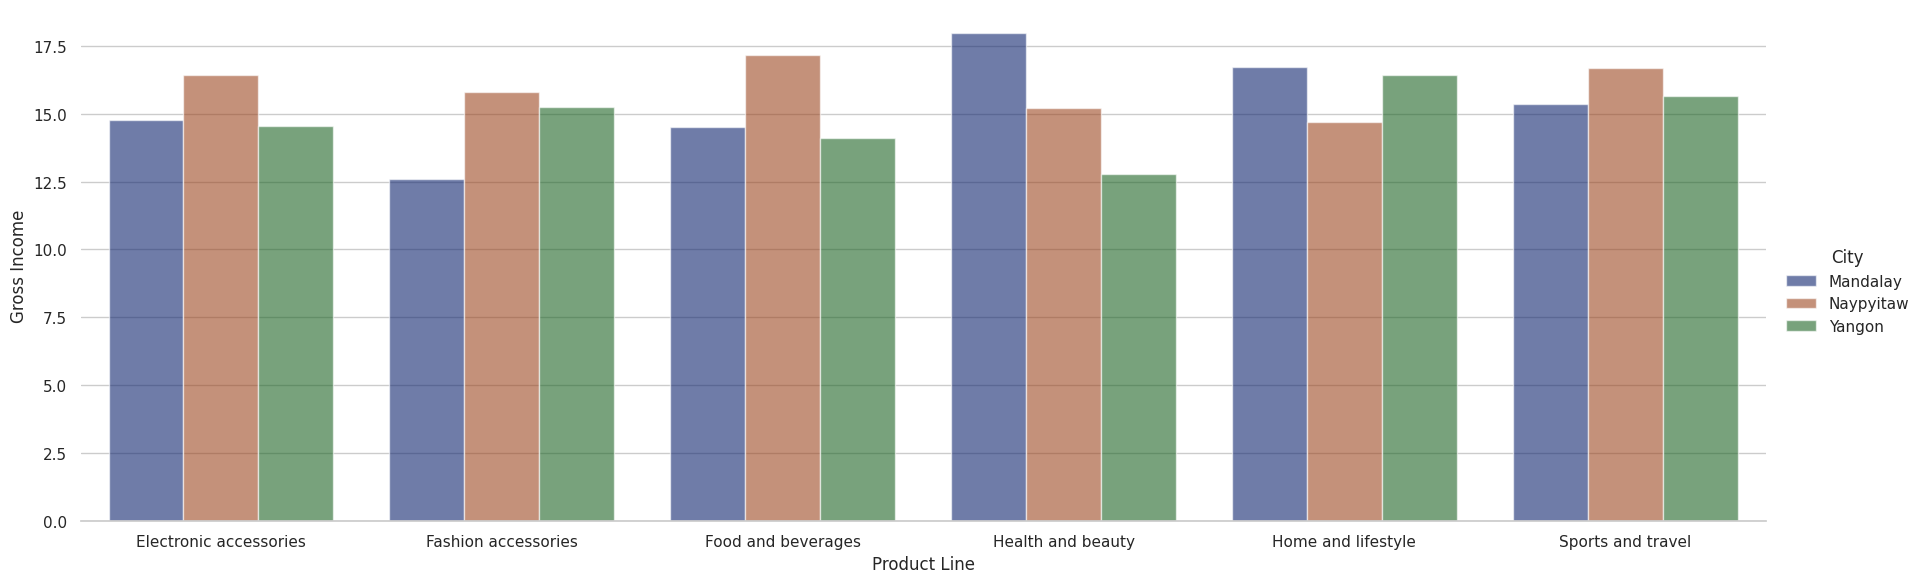

In [17]:
import warnings
with warnings.catch_warnings():
    warnings.filterwarnings("ignore", category=UserWarning)
    import seaborn as sns
    sns.set_theme(style="whitegrid")

    # Draw a nested barplot by species and sex
    g = sns.catplot(
        data=result_df, kind="bar",
        x="Product line", y="mean_gross_income", hue="City",
        errorbar="sd", palette="dark", alpha=.6, height=6, aspect = 3.0 # 
    )
    g.despine(left=True)
    g.set_axis_labels("Product Line", "Gross Income")
    g.legend.set_title("City")
    g.set_titles("Plot product line's mean gross income trend by city")

In [18]:
# nbval: skip
mean_product_total_qty_by_city = sales_data.groupby(['City', 'Product line'])['Quantity'].sum()
mean_product_total_qty_by_city
result_sum_df = mean_product_total_qty_by_city.reset_index(name='qty_by_city')
result_sum_df.head()

,City,Product line,qty_by_city
0,Mandalay,Electronic accessories,316
1,Mandalay,Fashion accessories,297
2,Mandalay,Food and beverages,270
3,Mandalay,Health and beauty,320
4,Mandalay,Home and lifestyle,295


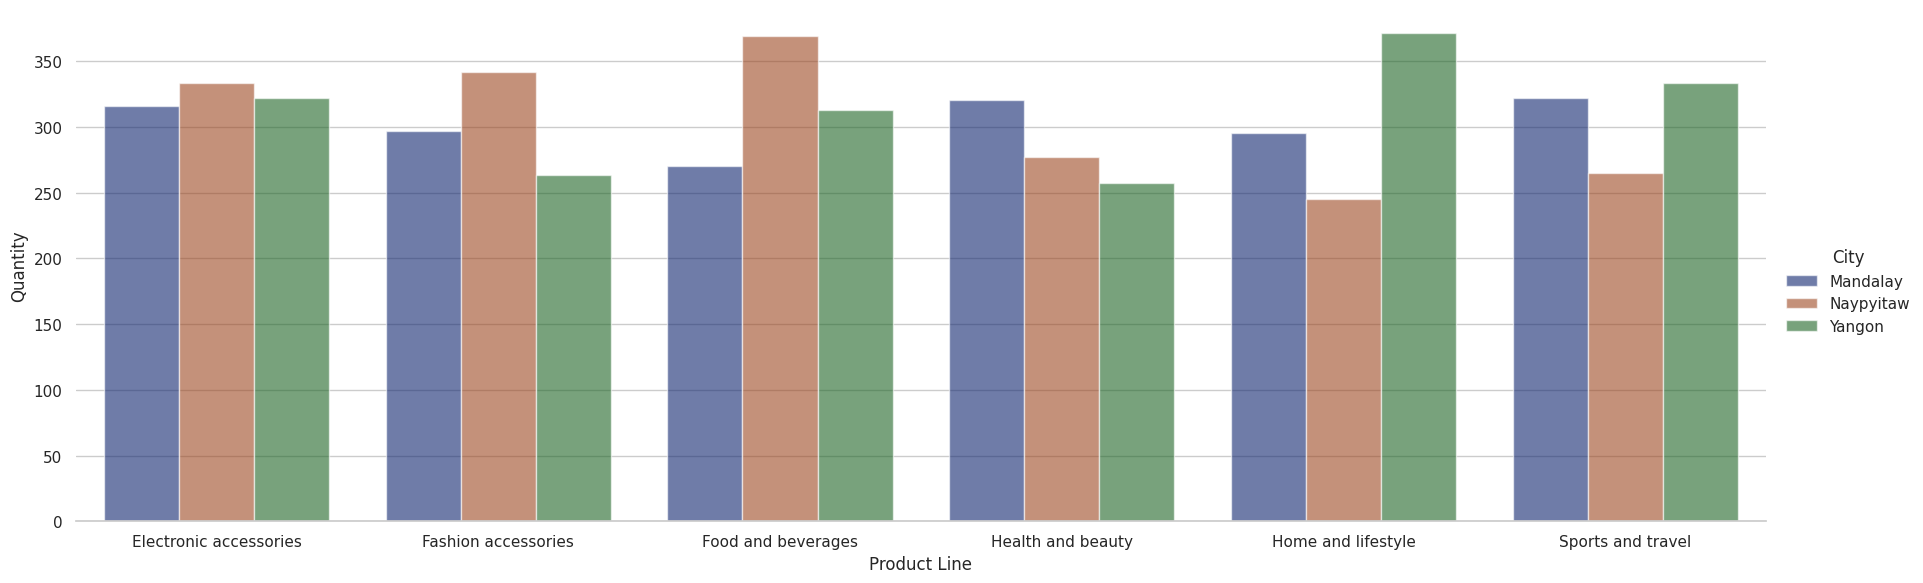

In [19]:
import warnings
with warnings.catch_warnings():
    warnings.filterwarnings("ignore", category=UserWarning)
    sns.set_theme(style="whitegrid")

    # Draw a nested barplot by species and sex
    g = sns.catplot(
        data=result_sum_df, kind="bar",
        x="Product line", y="qty_by_city", hue="City",
        errorbar="sd", palette="dark", alpha=.6, height=6, aspect = 3.0 # 
    )
    g.despine(left=True)
    g.set_axis_labels("Product Line", "Quantity")
    g.legend.set_title("City")

## Appendix

### Tips to make new data frame from summary data to plot trends

A DataFrame with the mean as its own column using the provided code. 

We'll use the Pandas `groupby` method to group the data by the 'City' and 'Product line' columns and calculate the mean of the 'gross income' column for each group. Then, we'll create a new DataFrame that includes the calculated mean as its own column.

Assuming you have a DataFrame called 'sales_data' and you want to create a new DataFrame with the mean of 'gross income' as its own column, you can do it like this:

```python
import pandas as pd

# Assuming you have a DataFrame named 'sales_data'
# Let's create a sample DataFrame for demonstration
data = {'City': ['New York', 'New York', 'San Francisco', 'San Francisco'],
        'Product line': ['Electronics', 'Fashion', 'Electronics', 'Fashion'],
        'gross income': [1200, 800, 1500, 1000]}

sales_data = pd.DataFrame(data)

# Grouping by 'City' and 'Product line' and calculating the mean of 'gross income'
grouped_data = sales_data.groupby(['City', 'Product line'])['gross income'].mean()

# Converting the grouped data into a DataFrame with a new column for mean
result_df = grouped_data.reset_index(name='mean_gross_income')

print(result_df)
```

In this code, we first create a sample DataFrame named 'sales_data'. Then, we use the `groupby` method to group the data by 'City' and 'Product line', and calculate the mean of the 'gross income' column for each group. Finally, we use the `reset_index` method to convert the grouped data into a new DataFrame, and we rename the column with the calculated mean as 'mean_gross_income'. This resulting DataFrame includes the mean of 'gross income' as its own column.

You can replace the sample data with your actual data from the provided code to get the desired result.

### Tips to remove the warning messages 

```
"/home/codespace/.local/lib/python3.10/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)"
```

The warning message you're seeing is related to the layout of the figure in Seaborn. It indicates that there has been a change in the figure layout to "tight." This warning is primarily informational and is usually generated when you create a Seaborn plot.

The warning is letting you know that the plot layout may have changed, which could potentially affect the positioning of elements in the figure. However, in most cases, this warning can be safely ignored. It's just a heads-up that Seaborn has adjusted the figure layout to ensure that the plot is properly displayed.

If the plot looks fine and you're not experiencing any issues with the layout of the elements in the plot, you can disregard this warning. Seaborn internally manages the figure layout to ensure that the plots are visually appealing and properly arranged, and this warning is just to inform you about this adjustment.

If you want to suppress this specific warning, you can use the `warnings` module in Python to temporarily filter out the UserWarning messages:

```python
import warnings

with warnings.catch_warnings():
    warnings.filterwarnings("ignore", category=UserWarning)
    
    # Your code here
    
# The warning messages within this block will be temporarily ignored
```

However, please note that it's generally a good practice to keep an eye on warnings, as they can sometimes provide important information about potential issues in your code or changes in the behavior of libraries you're using. If the layout of your plot is as expected, there's no need to worry about this specific warning.